# Assignment for **Tools and Programming**

*This Assignment was created by:*

**Martin Brucker 942815** and **Frederik Brinkmann 943915**

**Deadline:** 26.10.2023, 11:59 PM

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 📊 Data Import and Cleaning 🧹

### 📥 Import Data
- In this section, we'll read the data and get it ready for analysis.

### 🔄 Merge DataFrames
- Merge the "results" and "athletes" DataFrames to create a cohesive dataset.

### 📌 Set Athletes as the Index
- For better data management and easier reference, we'll set the "Athletes" column as the index for our DataFrame.



In [3]:
# importing data from files
results = pd.read_csv("data/results.csv")
athletes = pd.read_csv(filepath_or_buffer="data/athletes.txt", sep=";")

# merging with an inner join to merge the athlets with the results
merged_results_athletes = pd.merge(left = athletes, right = results, how="inner")

# each athlete as a row of the dataframe
merged_results_athletes.set_index("athlete", inplace=True)

# 📊 Data Analysis and Transformation

In this section, we'll highlight key data analysis and transformation steps that prepare our dataset for further analysis and visualization.

## 🗂 Splitting "Born" and "Died" Columns

- **Born/Died Columns**: We divided the "Born" column into 🎂  "BirthDate" and 🌍 "BirthLocation," and the "Died" column into ⏳ "DeathDate" and 📍 "DeathLocation."

In [4]:
# Split the "Born" column into "BirthDate" and "BirthLocation" columns
born_df = merged_results_athletes['born'].str.extract(r'(\d+ [A-Za-z]+ \d{4}) in (.*)').rename(columns={0: 'birthDate', 1: 'birthLocation'})

# Split the "Died" column into "DeathDate" and "DeathLocation" columns
died_df = merged_results_athletes['died'].str.extract(r'(\d+ [A-Za-z]+ \d{4}) in (.*)').rename(columns={0: 'deathDate', 1: 'deathLocation'})

# Merge the Date and Location DataFrames with the original DataFrame
merged_results_athletes = pd.concat([merged_results_athletes, born_df, died_df], axis=1)

merged_results_athletes.drop(columns=['born', 'died'], inplace=True)

## 📏 Handling Height and Weight Data

- **Height/Weight Extraction**: Extracted numeric values from "measurements" for "Height" and "Weight."

- **Data Type Conversion**: Converted values to numeric data types and filled missing values (NaN) with -1.

- **Merged DataFrames**: Merged "Height" and "Weight" with the original dataset.

In [5]:
# Create separate DataFrames for Height and Weight
height_df = merged_results_athletes['measurements'].str.extract(r'(\d+ cm)').rename(columns={0: 'height'})
weight_df = merged_results_athletes['measurements'].str.extract(r'(\d+ kg)').rename(columns={0: 'weight'})

# Convert the extracted values to numeric and fill NaN values with -1
height_df['height'] = height_df['height'].str.extract(r'(\d+)').astype(float)
weight_df['weight'] = weight_df['weight'].str.extract(r'(\d+)').astype(float)
# Merge the Height and Weight DataFrames with the original DataFrame
merged_results_athletes = pd.concat([merged_results_athletes, height_df, weight_df], axis=1)

merged_results_athletes.drop('measurements', axis=1, inplace=True)

## 📝 Extracting Names

Split "name" into 👤 "firstName" and 📛 "lastName" for easier name management.

In [6]:
merged_results_athletes['firstName'] = merged_results_athletes['name'].str.split('•').str[0]
merged_results_athletes['lastName'] = merged_results_athletes['name'].str.split('•').str[-1]
merged_results_athletes.drop(columns='name', inplace=True)

## 📆 Converting Date Columns

- **Birth Date**: Transformed "birthDate" into a datetime object using the format "%d %B %Y." Handling unconvertible entries as "NaT."

- **Death Date**: Similar to "birthDate," converted "deathDate" into a datetime object, with proper handling for unconvertible entries.

In [7]:
# transform the birth date into a datetime object
merged_results_athletes['birthDate'] = pd.to_datetime(merged_results_athletes['birthDate'], format="%d %B %Y", errors='coerce')
merged_results_athletes['deathDate'] = pd.to_datetime(merged_results_athletes['deathDate'], format="%d %B %Y", errors='coerce')

In [8]:
#Quick Check
merged_results_athletes.head()

,sex,affiliations,title,year,season,sport,discipline,pos,medal,country,country_code,team,birthDate,birthLocation,deathDate,deathLocation,height,weight,firstName,lastName
athlete,,,,,,,,,,,,,,,,,,,,
179.0,Male,"Finower TTC, GER / TTF Liebherr Ochsenhausen E...",NaN,2012,Summer,Table Tennis,"Singles, Men",17.0,NaN,Greece,GRE,NaN,1972-03-08,Bistrița (ROU),NaT,NaN,169.0,62.0,Kallinikos,Kreangka
213.0,Female,Statisztika-Metalloglobus / Turnverein Busenba...,NaN,2012,Summer,Table Tennis,"Singles, Women",33.0,NaN,Hungary,HUN,NaN,1974-05-29,Miskolc (HUN),NaT,NaN,164.0,62.0,Krisztina,Tóth
279.0,Male,NaN,NaN,2012,Summer,Tennis,"Doubles, Men",9.0,NaN,India,IND,Rohan Bopanna,1974-06-07,"Chennai (Madras), Tamil Nadu (IND)",NaT,NaN,185.0,88.0,Mahesh,Bhupathi
287.0,Male,NaN,NaN,2016,Summer,Tennis,"Doubles, Men",17.0,NaN,India,IND,Rohan Bopanna,1973-06-17,"Kolkata (Calcutta), West Bengal (IND)",NaT,NaN,178.0,77.0,Leander,Paes
287.0,Male,NaN,NaN,2012,Summer,Tennis,"Doubles, Mixed",5.0,NaN,India,IND,Sania Mirza,1973-06-17,"Kolkata (Calcutta), West Bengal (IND)",NaT,NaN,178.0,77.0,Leander,Paes


# Exercise 1

- **Question**: Who is the most successful athlete since 2012, based on the number of gold medals won?


In [9]:
gold_medals = merged_results_athletes[merged_results_athletes['medal'] == 'Gold']
gold_medal_counts = gold_medals.groupby(['firstName', 'lastName'])['medal'].count().reset_index()
athlete_with_most_gold = gold_medal_counts[gold_medal_counts['medal'] == gold_medal_counts['medal'].max()]
print(athlete_with_most_gold)

     firstName lastName  medal
1314   Michael   Phelps      9


- **Question**:How many different athletes have participates in the Olympic Games since 2012?

In [10]:
# checking wich athletes have participated in the year 2012 or later
since2012 = merged_results_athletes[merged_results_athletes['year'] >= 2012]

# print how many unique values are in the index
print(f"There are {since2012.index.nunique()} athletes that have participated since 2012.")

There are 29655 athletes that have participated since 2012.


- **Question**: What are the 10 countries with the lowest ratio of female participants? Represent this information using a bar chart

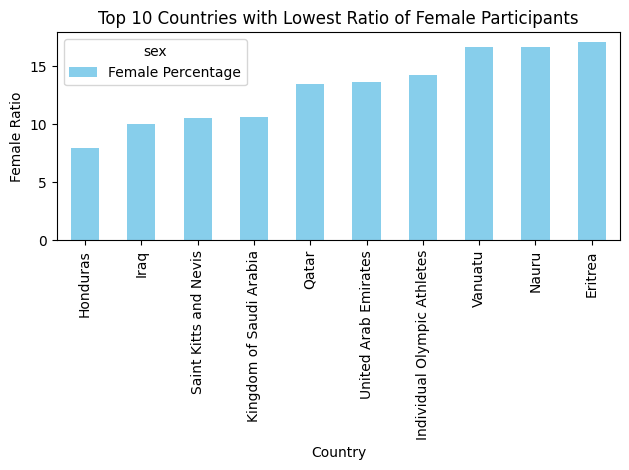

In [11]:
# Returns the ammount of male and female per country
perCountry = merged_results_athletes.groupby(['country', 'sex']).size().unstack(fill_value=0)
# Calculate the female percantage per country :)
perCountry['Female Percentage'] = (perCountry['Female'] / (perCountry['Female'] + perCountry['Male'])) * 100

# Give out the first 10 results
perCountry = perCountry.sort_values("Female Percentage").head(10)


# Print the top 10 Countries with Lowest Ratio of Female Participantsplt.figure(figsize=(12, 6))
perCountry[["Female Percentage"]].plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with Lowest Ratio of Female Participants')
plt.xlabel('Country')
plt.ylabel('Female Ratio')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Exercise 2

- **Question**: What are the three most common first names among female athletes from the country 'Republic of Korea'?

In [12]:
# Select female Korean athletes
female_korean_athletes = merged_results_athletes[(merged_results_athletes['sex'] == 'Female') & (merged_results_athletes['country'] == 'Republic of Korea')]

# Drop duplicates based on the athlete's name
female_korean_athletes_unique = female_korean_athletes[~female_korean_athletes.index.duplicated(keep='first')]

# Count the occurrences of each unique first name
common_first_names = female_korean_athletes_unique['firstName'].value_counts()

# Find the most common first name
most_common_first_name = common_first_names.idxmax()

# Print the most common first name and its count
print("The most common first name among female Korean athletes is:", most_common_first_name)
print("Count:", common_first_names.head(3))


The most common first name among female Korean athletes is: Kim
Count: firstName
Kim     72
Lee     31
Park    25
Name: count, dtype: int64


- **Question**: Who is the tallest female athlete? Provide the name, height, country and sport.

In [13]:
female_athletes = merged_results_athletes[(merged_results_athletes['sex'] == 'Female')]
female_athletes = female_athletes.dropna(subset=['height'])  
tallest_female = female_athletes.loc[female_athletes['height'].idxmax()]

# Extract the desired information
name = f"{tallest_female['firstName']} {tallest_female['lastName']}"
height = tallest_female['height']
country = tallest_female['country']
sport = tallest_female['sport']

# Print the information
print("Tallest Female Participant:")
print(f"Name: {name}")
print(f"Height: {height}")
print(f"Country: {country}")
print(f"Sport: {sport}")


Tallest Female Participant:
Name: Wei Wei
Height: 206.0
Country: People's Republic of China
Sport: Basketball 


#### ⚠️ INFO

Depending on whether you use an inner or outer join, the results may differ:

- Margo Dydek is the top female participant in the dataset, standing at an impressive height of 223 cm. However, it's important to note that she participated in the year 2000. Therefore, if you are looking to determine her country of origin, it should be based on her "born" country.

- **Question**: What are the 10 sports with the highest average weight of participants? Provide the sport and the
weight.

In [14]:
highest_weight = merged_results_athletes.groupby('sport')['weight'].mean().sort_values(ascending=False).head(10)
print(highest_weight)

sport
Bobsleigh          93.904545
3x3 Basketball     90.500000
Basketball         87.092564
Baseball           86.666667
Water Polo         85.910632
Handball           82.876325
Luge               81.003145
Rowing             80.387898
Volleyball         80.311239
Ice Hockey         80.188865
Name: weight, dtype: float64


- **Question**: What are the 3 sports with the largest number of participants that are severely underweight?
Provide the sport and the number of severely underweight participants. Severe underweight is
defined by a body-mass-index (BMI) smaller than 16, where BMI is calculate as weight/height2
in the unit kg/m2

In [15]:
# Calculate the BMI of each athlete
merged_results_athletes['BMI'] = merged_results_athletes['weight'] / (merged_results_athletes['height'] / 100) ** 2

# Find athletes with BMI < 16
underweight_athletes = merged_results_athletes[merged_results_athletes['BMI'] < 16]
underweight_athletes = underweight_athletes[~underweight_athletes.index.duplicated(keep='first')]

# Count the number of athletes in each sport
underweight_athletes_per_sport = underweight_athletes.groupby('sport').size().sort_values(ascending=False)

# Print the top 3 sports
top_3_sports = underweight_athletes_per_sport.head(3)
print("Top 3 sports with the most underweight athletes:")
print(top_3_sports)

Top 3 sports with the most underweight athletes:
sport
Rhythmic Gymnastics     8
Athletics               7
Figure Skating          3
dtype: int64


# Exercise 3

In the following questions, we'll calculate the age of participants. Age is defined as the number of completed years at the beginning of the Olympic Games in which the athlete participates. To calculate age, we'll (1) use the athlete's date of birth and (2) consider the opening date of the Olympic Games.

- **Question**: Who is the oldest athlete? Please provide the name and age.


In [16]:
# Calculate the age of each athlete
merged_results_athletes['age'] = merged_results_athletes['year'] - merged_results_athletes['birthDate'].dt.year

# Find the oldest athlete
oldest_athlete = merged_results_athletes.loc[merged_results_athletes['age'].idxmax()]

# Print the oldest athlete's first name, last name, and age
print(oldest_athlete[['firstName', 'lastName', 'age']])

firstName    Hiroshi
lastName     Hoketsu
age             71.0
Name: 12128.0, dtype: object


- **Question**:  What are the 10 sports with the highest average age of participants? Provide the sport and the
average age.

In [17]:
# what are the 10 sports with the highest average age of athletes
average_age_per_sport = merged_results_athletes.groupby('sport')['age'].mean().dropna()
average_age_per_sport.sort_values(ascending=False).head(10)

sport
Equestrian Jumping      39.517241
Equestrian Dressage     38.781893
Equestrian Eventing     38.048232
Shooting                31.542917
Curling                 30.456853
Beach Volleyball        29.698413
Baseball                29.576923
Golf                    29.556180
Bobsleigh               29.503546
Cycling Road            29.089080
Name: age, dtype: float64

# Exercise 4

- **Question**: Calculate the medal table for the Summer Olympic Games 2016 in Rio de Janeiro. Your medal table should match the official structure, including the same column names and sorting as the official table. Display the top 10 countries.

- **Hint**: In team events like Basketball, all team members of the winning team receive a gold medal. However, for the medal table, it should count as only one gold medal. This logic applies to silver and bronze medals as well. You can identify team events by multiple participants winning the same medal in one event or through the presence of the "team" column.

In [18]:
results = pd.read_csv("data/results.csv")

In [23]:
# Filter the dataset to include only the 2016 Summer Olympics in Rio de Janeiro
rio_2016_data = results[(results['year'] == 2016) & (results['season'] == 'Summer')]
rio_2016_data.head(100)

# Create a copy of the dataset to work with
medal_table = rio_2016_data.copy()

# For team events, remove duplicate rows and keep one representative row for each event
medal_table.drop_duplicates(subset=['sport', 'discipline', 'pos', "country"], keep='first', inplace=True)

# Create columns for gold, silver, and bronze medals with initial values of 0
medal_table['gold'] = 0
medal_table['silver'] = 0
medal_table['bronze'] = 0

# Assign medals based on medal positions
medal_table.loc[medal_table['medal'] == 'Gold', 'gold'] = 1
medal_table.loc[medal_table['medal'] == 'Silver', 'silver'] = 1
medal_table.loc[medal_table['medal'] == 'Bronze', 'bronze'] = 1

# Group the data by country and calculate the sum of gold, silver, and bronze medals
medal_table = medal_table.groupby('country').agg({'gold': 'sum', 'silver': 'sum', 'bronze': 'sum'}).reset_index()

# Calculate total medals for each country
medal_table['total'] = medal_table['gold'] + medal_table['silver'] + medal_table['bronze']

# Sort the medal table by gold, silver, and bronze medals in descending order
medal_table.sort_values(['gold', 'silver', 'bronze'], ascending=[False, False, False], inplace=True)

# Display the top 10 countries in the medal table
top_10_countries = medal_table
top_10_countries.head(10)


,country,gold,silver,bronze,total
197,United States,46,37,38,121
72,Great Britain,27,23,17,67
144,People's Republic of China,26,18,26,70
155,Russian Federation,19,17,20,56
70,Germany,17,10,17,44
94,Japan,12,8,21,41
67,France,10,18,14,42
152,Republic of Korea,9,3,9,21
92,Italy,8,12,8,28
10,Australia,8,11,10,29


# Exercise 5

- **Question**: Large countries tend to win more medals than smaller ones. Your task is to calculate a different version of the 2016 medal table that shows the number of gold, silver, and bronze medals per 1 million inhabitants. Display the top 10 countries in this new medal table.


In [20]:
import requests

# Make the API request
# SP.POP.TOTL for the indicator total propulation
# format = json to get a json file, the defaut is xml wich would need a external package to process
# date = 2016 to limit the returns only to the year in question wich is 2016
# per_page = 5000 to list all entrys in a single api request

url = "http://api.worldbank.org/v2/country/all/indicator/SP.POP.TOTL?format=json&date=2016&per_page=5000"
response = requests.get(url)

data = response.json()[1]

In [21]:
transformed_data = []

# Iterate through the data and extract the relevant fields
for entry in data:
    transformed_entry = {
        'Indicator ID': entry['indicator']['id'],
        'Indicator Value': entry['indicator']['value'],
        'Country ID': entry['country']['id'],
        'Country Value': entry['country']['value'],
        'Country ISO3 Code': entry['countryiso3code'],
        'Date': entry['date'],
        'Value': entry['value'],
        'Unit': entry['unit'],
        'Obs Status': entry['obs_status'],
        'Decimal': entry['decimal']
    }
    transformed_data.append(transformed_entry)

# Create a DataFrame from the transformed data
df = pd.DataFrame(transformed_data)

#### Background for Exercise 5

To align our dataset with the format of a Wikipedia page, similar to Exercise 4, we repeated the same data preparation steps in this task. This time, we added the country codes to facilitate the task's completion. As a result, the code in this section may appear repetitive due to the necessary data adjustments.

In [22]:
# Filter the dataset to include only the 2016 Summer Olympics in Rio de Janeiro
rio_2016_data = results[(results['year'] == 2016) & (results['season'] == 'Summer')]

# Create a copy of the dataset to work with
medal_table = rio_2016_data.copy()

# For team events, remove duplicate rows and keep one representative row for each event
medal_table.drop_duplicates(subset=['sport', 'discipline', 'pos', "country"], keep='first', inplace=True)

# Create columns for gold, silver, and bronze medals with initial values of 0
medal_table['gold'] = 0
medal_table['silver'] = 0
medal_table['bronze'] = 0

# Assign medals based on medal positions
medal_table.loc[medal_table['medal'] == 'Gold', 'gold'] = 1
medal_table.loc[medal_table['medal'] == 'Silver', 'silver'] = 1
medal_table.loc[medal_table['medal'] == 'Bronze', 'bronze'] = 1

# Group the data by country and country_code and calculate the sum of gold, silver, and bronze medals
medal_table = medal_table.groupby(['country', 'country_code']).agg({'gold': 'sum', 'silver': 'sum', 'bronze': 'sum'}).reset_index()

# Calculate total medals for each country
medal_table['total'] = medal_table['gold'] + medal_table['silver'] + medal_table['bronze']

# Sort the medal table by gold, silver, and bronze medals in descending order
medal_table.sort_values(['gold', 'silver', 'bronze'], ascending=[False, False, False], inplace=True)

df = df[["Country ISO3 Code","Value"]]

merged2016 = medal_table.merge(df, left_on="country_code", right_on="Country ISO3 Code")

merged2016['Gold Medals per Million Inhabitants'] = (merged2016['gold'] / (merged2016['Value'] / 1000000)).round(2)
merged2016['Silver Medals per Million Inhabitants'] = (merged2016['silver'] / (merged2016['Value'] / 1000000)).round(2)
merged2016['Bronze Medals per Million Inhabitants'] = (merged2016['bronze'] / (merged2016['Value'] / 1000000)).round(2)
merged2016['Total Medals per Million Inhabitants'] = (merged2016['total'] / (merged2016['Value'] / 1000000)).round(2)

sorted_data = merged2016.sort_values('Gold Medals per Million Inhabitants', ascending=False)

merged2016.sort_values('Total Medals per Million Inhabitants', ascending=False).head(10).drop(columns=['Country ISO3 Code', 'country_code'])


,country,gold,silver,bronze,total,Value,Gold Medals per Million Inhabitants,Silver Medals per Million Inhabitants,Bronze Medals per Million Inhabitants,Total Medals per Million Inhabitants
37,Bahrain,1,1,0,2,425994.0,2.35,2.35,0.00,4.69
13,Jamaica,6,3,2,11,2802695.0,2.14,1.07,0.71,3.92
15,New Zealand,4,9,5,18,4714100.0,0.85,1.91,1.06,3.82
29,Georgia,2,1,4,7,3727505.0,0.54,0.27,1.07,1.88
30,Azerbaijan,1,7,10,18,9757812.0,0.10,0.72,1.02,1.84
9,Hungary,8,3,4,15,9814023.0,0.82,0.31,0.41,1.53
33,Armenia,1,3,0,4,2865835.0,0.35,1.05,0.00,1.40
45,Lithuania,0,1,3,4,2868231.0,0.00,0.35,1.05,1.39
8,Australia,8,11,10,29,24190907.0,0.33,0.45,0.41,1.20
23,Serbia,2,4,2,8,7058322.0,0.28,0.57,0.28,1.13
